<a href="https://colab.research.google.com/github/cgree136/D3/blob/Homework3/Homework3(Diabetes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Accuracy: 0.7532467532467533
Final Precision: 0.6491228070175439
Final Recall: 0.6727272727272727
Final F1 Score: 0.6607142857142858


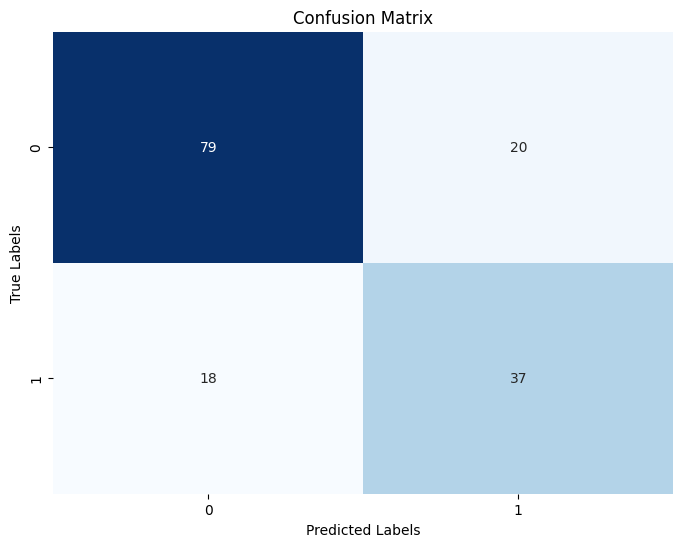

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = pd.DataFrame({
'Pregnancies': [6,	1,	8,	1,	0,	5,	3,	10,	2,	8,	4,	10,	10,	1,	5,	7,	0,	7,	1,	1,	3,	8,	7,	9,	11,	10,	7,	1,	13,	5,	5,	3,	3,	6,	10,	4,	11,	9,	2,	4,	3,	7,	7,	9,	7,	0,	1,	2,	7,	7,	1,	1,	5,	8,	7,	1,	7,	0,	0,	0,	2,	8,5, 2, 7, 5, 0, 2, 1, 4, 2, 5, 13, 4, 1, 1, 7, 5, 0, 2, 3, 2, 7, 0, 5, 2, 13, 2, 15, 1, 1, 4, 7, 4, 2, 6, 2, 1, 6, 1, 1, 1, 0, 1, 2, 1, 1, 4, 3, 0, 3, 8, 1, 4, 7, 4, 5, 5, 4, 4, 0, 6, 2, 5, 0, 1, 3, 1, 1, 0, 4, 9, 3, 8, 2, 2, 0, 0, 0, 5, 3, 5, 2, 10, 4, 0, 9, 2, 5, 2, 1, 4, 9, 1, 8, 7, 2, 1, 2, 17, 4, 7, 0, 2, 0, 6, 3, 4, 4, 3, 6, 6, 2, 1, 2, 8, 6, 0, 5, 5, 6, 0, 1, 5, 4, 7, 8, 1, 8, 5, 3, 9, 7, 11, 8, 5, 1, 3, 4, 4, 0, 1, 0, 2, 6, 5, 8, 5, 1, 7, 2, 0, 7, 0, 9, 12, 5, 6, 5, 5, 0, 2, 7, 7, 1, 1, 0, 3, 4, 0, 4, 6, 1, 4, 3, 4, 7, 0, 9, 0, 1, 4, 3, 6, 2, 9, 10, 0, 9, 1, 9, 2, 2, 0, 12, 1, 3, 2, 1, 11, 3, 3, 4, 3, 4, 5, 0, 2, 0, 2, 10, 2, 3, 1, 13, 2, 7, 0, 5, 2, 0, 10, 7, 7, 2, 7, 5, 1, 4, 5, 0, 0, 2, 1, 0, 6, 2, 0, 14, 8, 0, 2, 5, 5, 3, 2, 10, 0, 0, 2, 6, 0, 2, 3, 7, 2, 3, 3, 3, 6, 4, 3, 0, 13, 2, 1, 1, 10, 2, 6, 8, 2, 1, 12, 1, 0, 0, 5, 9, 7, 1, 1, 1, 5, 8, 8, 1, 3, 3, 5, 4, 4, 3, 1, 3, 9, 1, 13, 12, 1, 5, 5, 5, 4, 4, 5, 6, 0, 3, 1, 3, 0, 0, 2, 2, 12, 0, 1, 4, 0, 1, 0, 1, 1, 1, 1, 5, 8, 5, 3, 1, 5, 1, 4, 4, 2, 3, 0, 3, 3, 4, 6, 5, 9, 5, 2, 4, 0, 8, 1, 6, 1, 1, 1, 0, 3, 1, 4, 1, 3, 1, 2, 0, 2, 8, 4, 0, 1, 0, 1, 2, 3, 1, 2, 1, 0, 12, 5, 1, 6, 0, 2, 4, 8, 4, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 14, 1, 5, 10, 9, 9, 1, 8, 5, 10, 0, 0, 0, 8, 6, 1, 0, 0, 7, 4, 0, 2, 7, 8, 4, 3, 0, 4, 0, 0, 0, 1, 0, 4, 8, 2, 2, 4, 4, 3, 6, 5, 2, 7, 6, 2, 3, 6, 7, 3, 10, 0, 1, 2, 8, 12, 0, 9, 2, 3, 3, 9, 7, 13, 6, 2, 3, 6, 9, 3, 3, 1, 3, 0, 0, 2, 0, 1, 6, 1, 4, 0, 0, 0, 3, 8, 3, 10, 4, 1, 8, 5, 4, 1, 4, 1, 3, 6, 1, 1, 7, 1, 8, 11, 11, 6, 0, 1, 6, 0, 2, 1, 6, 4, 0, 3, 2, 3, 2, 1, 1, 6, 2, 10, 2, 0, 6, 12, 8, 8, 1, 8, 6, 3, 0, 11, 2, 3, 2, 6, 0, 0, 1, 1, 1, 1, 6, 1, 7, 4, 1, 1, 1, 0, 1, 3, 3, 7, 6, 11, 3, 6, 2, 9, 0, 2, 2, 6, 0, 2, 4, 0, 0, 5, 4, 7, 0, 2, 1, 10, 13, 5, 2, 7, 1, 0, 4, 6, 4, 3, 2, 1, 0, 11, 0, 1, 1, 5, 2, 1, 2, 2, 1, 11, 3, 10, 1, 8, 9, 6, 1, 4, 10, 6, 9, 6, 1, 10, 3, 8, 6, 9, 0, 3, 2, 2, 0, 0, 4, 5, 2, 3, 1, 1, 1, 8, 13, 2, 7, 2, 7, 3, 0, 4, 4, 2, 6, 1, 2, 4, 6, 10, 2, 9, 2, 3, 5, 10, 0, 3, 7, 3, 10, 1, 5, 4, 1, 1, 5, 1, 4, 1, 0, 2, 2, 3, 8, 2, 2, 2, 4, 0, 8, 2, 1, 11, 3, 1, 9, 13, 12, 1, 1, 3, 6, 4, 1, 3, 0, 8, 1, 7, 0, 1, 6, 2, 9, 9, 10, 2, 5, 1, 1],
'Glucose':	[148,	85,	183,	89,	137,	116,	78,	115,	197,	125,	110,	168,	139,	189,	166,	100,	118,	107,	103,	115,	126,	99,	196,	119,	143,	125,	147,	97,	145,	117,	109,	158,	88,	92,	122,	103,	138,	102,	90,	111,	180,	133,	106,	171,	159,	180,	146,	71,	103,	105,	103,	101,	88,	176,	150,	73,	187,	100,	146,	105,	84,	133,44, 141, 114, 99, 109, 109, 95, 146, 100, 139, 126, 129, 79, 0, 62, 95, 131, 112, 113, 74, 83, 101, 137, 110, 106, 100, 136, 107, 80, 123, 81, 134, 142, 144, 92, 71, 93, 122, 163, 151, 125, 81, 85, 126, 96, 144, 83, 95, 171, 155, 89, 76, 160, 146, 124, 78, 97, 99, 162, 111, 107, 132, 113, 88, 120, 118, 117, 105, 173, 122, 170, 84, 96, 125, 100, 93, 129, 105, 128, 106, 108, 108, 154, 102, 57, 106, 147, 90, 136, 114, 156, 153, 188, 152, 99, 109, 88, 163, 151, 102, 114, 100, 131, 104, 148, 120, 110, 111, 102, 134, 87, 79, 75, 179, 85, 129, 143, 130, 87, 119, 0, 73, 141, 194, 181, 128, 109, 139, 111, 123, 159, 135, 85, 158, 105, 107, 109, 148, 113, 138, 108, 99, 103, 111, 196, 162, 96, 184, 81, 147, 179, 140, 112, 151, 109, 125, 85, 112, 177, 158, 119, 142, 100, 87, 101, 162, 197, 117, 142, 134, 79, 122, 74, 171, 181, 179, 164, 104, 91, 91, 139, 119, 146, 184, 122, 165, 124, 111, 106, 129, 90, 86, 92, 113, 111, 114, 193, 155, 191, 141, 95, 142, 123, 96, 138, 128, 102, 146, 101, 108, 122, 71, 106, 100, 106, 104, 114, 108, 146, 129, 133, 161, 108, 136, 155, 119, 96, 108, 78, 107, 128, 128, 161, 151, 146, 126, 100, 112, 167, 144, 77, 115, 150, 120, 161, 137, 128, 124, 80, 106, 155, 113, 109, 112, 99, 182, 115, 194, 129, 112, 124, 152, 112, 157, 122, 179, 102, 105, 118, 87, 180, 106, 95, 165, 117, 115, 152, 178, 130, 95, 0, 122, 95, 126, 139, 116, 99, 0, 92, 137, 61, 90, 90, 165, 125, 129, 88, 196, 189, 158, 103, 146, 147, 99, 124, 101, 81, 133, 173, 118, 84, 105, 122, 140, 98, 87, 156, 93, 107, 105, 109, 90, 125, 119, 116, 105, 144, 100, 100, 166, 131, 116, 158, 127, 96, 131, 82, 193, 95, 137, 136, 72, 168, 123, 115, 101, 197, 172, 102, 112, 143, 143, 138, 173, 97, 144, 83, 129, 119, 94, 102, 115, 151, 184, 94, 181, 135, 95, 99, 89, 80, 139, 90, 141, 140, 147, 97, 107, 189, 83, 117, 108, 117, 180, 100, 95, 104, 120, 82, 134, 91, 119, 100, 175, 135, 86, 148, 134, 120, 71, 74, 88, 115, 124, 74, 97, 120, 154, 144, 137, 119, 136, 114, 137, 105, 114, 126, 132, 158, 123, 85, 84, 145, 135, 139, 173, 99, 194, 83, 89, 99, 125, 80, 166, 110, 81, 195, 154, 117, 84, 0, 94, 96, 75, 180, 130, 84, 120, 84, 139, 91, 91, 99, 163, 145, 125, 76, 129, 68, 124, 114, 130, 125, 87, 97, 116, 117, 111, 122, 107, 86, 91, 77, 132, 105, 57, 127, 129, 100, 128, 90, 84, 88, 186, 187, 131, 164, 189, 116, 84, 114, 88, 84, 124, 97, 110, 103, 85, 125, 198, 87, 99, 91, 95, 99, 92, 154, 121, 78, 130, 111, 98, 143, 119, 108, 118, 133, 197, 151, 109, 121, 100, 124, 93, 143, 103, 176, 73, 111, 112, 132, 82, 123, 188, 67, 89, 173, 109, 108, 96, 124, 150, 183, 124, 181, 92, 152, 111, 106, 174, 168, 105, 138, 106, 117, 68, 112, 119, 112, 92, 183, 94, 108, 90, 125, 132, 128, 94, 114, 102, 111, 128, 92, 104, 104, 94, 97, 100, 102, 128, 147, 90, 103, 157, 167, 179, 136, 107, 91, 117, 123, 120, 106, 155, 101, 120, 127, 80, 162, 199, 167, 145, 115, 112, 145, 111, 98, 154, 165, 99, 68, 123, 91, 195, 156, 93, 121, 101, 56, 162, 95, 125, 136, 129, 130, 107, 140, 144, 107, 158, 121, 129, 90, 142, 169, 99, 127, 118, 122, 125, 168, 129, 110, 80, 115, 127, 164, 93, 158, 126, 129, 134, 102, 187, 173, 94, 108, 97, 83, 114, 149, 117, 111, 112, 116, 141, 175, 92, 130, 120, 174, 106, 105, 95, 126, 65, 99, 102, 120, 102, 109, 140, 153, 100, 147, 81, 187, 162, 136, 121, 108, 181, 154, 128, 137, 123, 106, 190, 88, 170, 89, 101, 122, 121, 126, 93],
'BloodPressure':	[72,	66,	64,	66,	40,	74,	50,	0,	70,	96,	92,	74,	80,	60,	72,	0,	84,	74,	30,	70,	88,	84,	90,	80,	94,	70,	76,	66,	82,	92,	75,	76,	58,	92,	78,	60,	76,	76,	68,	72,	64,	84,	92,	110,	64,	66,	56,	70,	66,	0,	80,	50,	66,	90,	66,	50,	68,	88,	82,	64,	0,	72,62, 58, 66, 74, 88, 92, 66, 85, 66, 64, 90, 86, 75, 48, 78, 72, 0, 66, 44, 0, 78, 65, 108, 74, 72, 68, 70, 68, 55, 80, 78, 72, 82, 72, 62, 48, 50, 90, 72, 60, 96, 72, 65, 56, 122, 58, 58, 85, 72, 62, 76, 62, 54, 92, 74, 48, 60, 76, 76, 64, 74, 80, 76, 30, 70, 58, 88, 84, 70, 56, 64, 74, 68, 60, 70, 60, 80, 72, 78, 82, 52, 66, 62, 75, 80, 64, 78, 70, 74, 65, 86, 82, 78, 88, 52, 56, 74, 72, 90, 74, 80, 64, 88, 74, 66, 68, 66, 90, 82, 70, 0, 60, 64, 72, 78, 110, 78, 82, 80, 64, 74, 60, 74, 68, 68, 98, 76, 80, 62, 70, 66, 0, 55, 84, 58, 62, 64, 60, 80, 82, 68, 70, 72, 72, 76, 104, 64, 84, 60, 85, 95, 65, 82, 70, 62, 68, 74, 66, 60, 90, 0, 60, 66, 78, 76, 52, 70, 80, 86, 80, 80, 68, 68, 72, 84, 90, 84, 76, 64, 70, 54, 50, 76, 85, 68, 90, 70, 86, 52, 84, 80, 68, 62, 64, 56, 68, 50, 76, 68, 0, 70, 80, 62, 74, 0, 64, 52, 0, 86, 62, 78, 78, 70, 70, 60, 64, 74, 62, 70, 76, 88, 86, 80, 74, 84, 86, 56, 72, 88, 62, 78, 48, 50, 62, 70, 84, 78, 72, 0, 58, 82, 98, 76, 76, 68, 68, 68, 68, 66, 70, 74, 50, 80, 68, 80, 74, 66, 78, 60, 74, 70, 90, 75, 72, 64, 70, 86, 70, 72, 58, 0, 80, 60, 76, 0, 76, 78, 84, 70, 74, 68, 86, 72, 88, 46, 0, 62, 80, 80, 84, 82, 62, 78, 88, 50, 0, 74, 76, 64, 70, 108, 78, 74, 54, 72, 64, 86, 102, 82, 64, 64, 58, 52, 82, 82, 60, 75, 100, 72, 68, 60, 62, 70, 54, 74, 100, 82, 68, 66, 76, 64, 72, 78, 58, 56, 66, 70, 70, 64, 61, 84, 78, 64, 48, 72, 62, 74, 68, 90, 72, 84, 74, 60, 84, 68, 82, 68, 64, 88, 68, 64, 64, 78, 78, 0, 64, 94, 82, 0, 74, 74, 75, 68, 0, 85, 75, 70, 88, 104, 66, 64, 70, 62, 78, 72, 80, 64, 74, 64, 70, 68, 0, 54, 62, 54, 68, 84, 74, 72, 62, 70, 78, 98, 56, 52, 64, 0, 78, 82, 70, 66, 90, 64, 84, 80, 76, 74, 86, 70, 88, 58, 82, 0, 68, 62, 78, 72, 80, 65, 90, 68, 70, 0, 74, 68, 72, 70, 74, 90, 72, 68, 64, 78, 82, 90, 60, 50, 78, 72, 62, 68, 62, 54, 70, 88, 86, 60, 90, 70, 80, 0, 70, 58, 60, 64, 74, 66, 65, 60, 76, 66, 0, 56, 0, 90, 60, 80, 92, 74, 72, 85, 90, 78, 90, 76, 68, 82, 110, 70, 68, 88, 62, 64, 70, 70, 76, 68, 74, 76, 66, 68, 60, 80, 54, 72, 62, 72, 66, 70, 96, 58, 60, 86, 44, 44, 80, 68, 70, 90, 60, 78, 76, 76, 56, 66, 66, 86, 0, 84, 78, 80, 52, 72, 82, 76, 24, 74, 38, 88, 0, 74, 78, 0, 60, 78, 62, 82, 62, 54, 58, 88, 80, 74, 72, 96, 62, 82, 0, 86, 76, 94, 70, 64, 88, 68, 78, 80, 65, 64, 78, 60, 82, 62, 72, 74, 76, 76, 74, 86, 70, 80, 0, 72, 74, 74, 50, 84, 60, 54, 60, 74, 54, 70, 52, 58, 80, 106, 82, 84, 76, 106, 80, 60, 80, 82, 70, 58, 78, 68, 58, 106, 100, 82, 70, 86, 60, 52, 58, 56, 76, 64, 80, 82, 74, 64, 50, 74, 82, 80, 114, 70, 68, 60, 90, 74, 0, 88, 70, 76, 78, 88, 0, 76, 80, 0, 46, 78, 64, 64, 78, 62, 58, 74, 50, 78, 72, 60, 76, 86, 66, 68, 86, 94, 78, 78, 84, 88, 52, 78, 86, 88, 56, 75, 60, 86, 72, 60, 74, 80, 44, 58, 94, 88, 84, 94, 74, 70, 62, 70, 78, 62, 88, 78, 88, 90, 72, 76, 92, 58, 74, 62, 76, 70, 72, 60, 70],
'SkinThickness':	[35,	29,	0,	23,	35,	0,	32,	0,	45,	0,	0,	0,	0,	23,	19,	0,	47,	0,	38,	30,	41,	0,	0,	35,	33,	26,	0,	15,	19,	0,	26,	36,	11,	0,	31,	33,	0,	37,	42,	47,	25,	0,	18,	24,	0,	39,	0,	27,	32,	0,	11,	15,	21,	34,	42,	10,	39,	60,	0,	41,	0,	0,0, 34, 0, 27, 30, 0, 13, 27, 20, 35, 0, 20, 30, 20, 0, 33, 0, 22, 13, 0, 26, 28, 0, 29, 54, 25, 32, 19, 0, 15, 40, 0, 18, 27, 28, 18, 30, 51, 0, 0, 0, 18, 0, 29, 0, 28, 31, 25, 33, 26, 34, 0, 32, 0, 0, 0, 23, 15, 56, 39, 30, 0, 0, 42, 30, 36, 24, 0, 14, 0, 37, 31, 13, 20, 26, 25, 0, 29, 0, 30, 26, 0, 31, 23, 37, 35, 0, 17, 50, 0, 28, 42, 0, 44, 15, 21, 19, 41, 38, 40, 34, 23, 0, 18, 25, 0, 0, 12, 0, 23, 23, 42, 24, 42, 0, 46, 0, 0, 0, 18, 20, 0, 0, 28, 36, 41, 39, 35, 0, 44, 0, 0, 20, 41, 0, 13, 44, 27, 16, 0, 20, 16, 32, 28, 29, 0, 27, 33, 22, 54, 31, 26, 32, 40, 41, 30, 22, 0, 29, 0, 0, 33, 15, 27, 0, 38, 39, 31, 0, 37, 25, 0, 28, 0, 21, 27, 21, 0, 24, 32, 0, 22, 35, 15, 0, 33, 33, 19, 0, 0, 14, 32, 7, 35, 39, 22, 16, 28, 15, 0, 32, 15, 0, 18, 0, 42, 0, 0, 37, 32, 0, 50, 0, 52, 24, 23, 0, 10, 0, 28, 15, 0, 0, 26, 44, 39, 17, 43, 29, 30, 37, 45, 0, 31, 38, 29, 25, 0, 0, 33, 41, 0, 0, 37, 23, 14, 19, 28, 30, 37, 17, 10, 31, 22, 11, 0, 39, 0, 12, 30, 20, 33, 32, 21, 32, 0, 36, 32, 19, 16, 0, 0, 18, 43, 0, 0, 34, 0, 13, 21, 35, 0, 0, 36, 19, 0, 19, 32, 0, 0, 28, 12, 0, 0, 40, 30, 40, 36, 33, 0, 37, 0, 25, 28, 0, 17, 16, 28, 48, 23, 22, 40, 43, 43, 15, 37, 0, 39, 30, 22, 8, 18, 24, 13, 29, 36, 26, 23, 29, 0, 14, 12, 0, 24, 34, 40, 0, 31, 0, 0, 41, 25, 0, 32, 0, 0, 0, 49, 39, 30, 23, 22, 35, 33, 21, 32, 0, 29, 41, 18, 46, 22, 32, 39, 0, 30, 46, 25, 0, 16, 11, 0, 8, 0, 33, 0, 15, 0, 25, 23, 27, 0, 12, 63, 12, 45, 37, 18, 13, 0, 32, 0, 28, 30, 0, 28, 48, 33, 22, 0, 40, 30, 0, 13, 10, 36, 0, 41, 40, 38, 27, 0, 0, 27, 45, 17, 38, 31, 30, 37, 22, 31, 0, 42, 41, 32, 17, 0, 28, 30, 38, 18, 0, 0, 0, 15, 33, 32, 19, 32, 41, 25, 39, 0, 26, 23, 23, 0, 31, 17, 0, 0, 19, 18, 34, 0, 0, 7, 32, 33, 0, 0, 0, 18, 19, 15, 31, 0, 18, 0, 52, 0, 30, 0, 0, 0, 37, 49, 40, 25, 32, 23, 29, 35, 27, 21, 43, 31, 28, 30, 0, 24, 23, 33, 40, 0, 40, 0, 0, 32, 34, 19, 0, 14, 30, 32, 29, 30, 0, 0, 31, 17, 30, 47, 20, 0, 0, 99, 46, 27, 17, 0, 24, 11, 0, 0, 27, 0, 40, 50, 0, 22, 45, 14, 0, 19, 0, 18, 19, 0, 36, 29, 0, 32, 42, 25, 39, 13, 21, 22, 42, 28, 26, 0, 0, 13, 24, 0, 42, 20, 0, 27, 0, 47, 0, 0, 0, 22, 0, 40, 0, 17, 0, 0, 0, 18, 32, 12, 17, 0, 0, 0, 30, 35, 17, 36, 35, 25, 25, 23, 40, 0, 28, 27, 35, 48, 0, 31, 0, 43, 46, 46, 39, 45, 18, 27, 33, 30, 26, 10, 23, 35, 0, 0, 0, 0, 0, 17, 28, 36, 39, 0, 0, 26, 0, 19, 26, 46, 0, 0, 32, 49, 0, 24, 19, 0, 11, 0, 27, 31, 29, 0, 20, 36, 0, 21, 0, 32, 13, 27, 36, 20, 0, 33, 39, 18, 46, 27, 19, 36, 29, 30, 0, 40, 29, 26, 0, 0, 23, 0, 37, 27, 0, 32, 27, 23, 17, 0, 37, 20, 18, 0, 37, 33, 41, 41, 22, 0, 0, 39, 24, 44, 32, 39, 41, 0, 0, 0, 26, 31, 0, 48, 27, 23, 0, 31],
'Insulin':	[0,	0,	0,	94,	168,	0,	88,	0,	543,	0,	0,	0,	0,	846,	175,	0,	230,	0,	83,	96,	235,	0,	0,	0,	146,	115,	0,	140,	110,	0,	0,	245,	54,	0,	0,	192,	0,	0,	0,	207,	70,	0,	0,	240,	0,	0,	0,	0,	0,	0,	82,	36,	23,	300,	342,	0,	304,	110,	0,	142,	0,	0,0, 128, 0, 0, 0, 0, 38, 100, 90, 140, 0, 270, 0, 0, 0, 0, 0, 0, 0, 0, 71, 0, 0, 125, 0, 71, 110, 0, 0, 176, 48, 0, 64, 228, 0, 76, 64, 220, 0, 0, 0, 40, 0, 152, 0, 140, 18, 36, 135, 495, 37, 0, 175, 0, 0, 0, 0, 51, 100, 0, 100, 0, 0, 99, 135, 94, 145, 0, 168, 0, 225, 0, 49, 140, 50, 92, 0, 325, 0, 0, 63, 0, 284, 0, 0, 119, 0, 0, 204, 0, 155, 485, 0, 0, 94, 135, 53, 114, 0, 105, 285, 0, 0, 156, 0, 0, 0, 78, 0, 130, 0, 48, 55, 130, 0, 130, 0, 0, 0, 92, 23, 0, 0, 0, 495, 58, 114, 160, 0, 94, 0, 0, 0, 210, 0, 48, 99, 318, 0, 0, 0, 44, 190, 0, 280, 0, 87, 0, 0, 0, 0, 130, 175, 271, 129, 120, 0, 0, 478, 0, 0, 190, 56, 32, 0, 0, 744, 53, 0, 370, 37, 0, 45, 0, 192, 0, 0, 0, 0, 88, 0, 176, 194, 0, 0, 680, 402, 0, 0, 0, 55, 0, 258, 0, 0, 0, 375, 150, 130, 0, 0, 0, 0, 67, 0, 0, 0, 0, 0, 56, 0, 45, 0, 57, 0, 116, 0, 278, 0, 122, 155, 0, 0, 135, 545, 220, 49, 75, 40, 74, 182, 194, 0, 120, 360, 215, 184, 0, 0, 135, 42, 0, 0, 105, 132, 148, 180, 205, 0, 148, 96, 85, 0, 94, 64, 0, 140, 0, 231, 0, 0, 29, 0, 168, 156, 0, 120, 68, 0, 52, 0, 0, 58, 255, 0, 0, 171, 0, 105, 73, 0, 0, 0, 108, 83, 0, 74, 0, 0, 0, 0, 43, 0, 0, 167, 0, 54, 249, 325, 0, 0, 0, 293, 83, 0, 0, 66, 140, 465, 89, 66, 94, 158, 325, 84, 75, 0, 72, 82, 0, 182, 59, 110, 50, 0, 0, 285, 81, 196, 0, 415, 87, 0, 275, 115, 0, 0, 0, 0, 0, 88, 0, 0, 165, 0, 0, 0, 579, 0, 176, 310, 61, 167, 474, 0, 0, 0, 115, 170, 76, 78, 0, 210, 277, 0, 180, 145, 180, 0, 85, 60, 0, 0, 0, 0, 0, 0, 0, 0, 50, 120, 0, 0, 14, 70, 92, 64, 63, 95, 0, 210, 0, 105, 0, 0, 71, 237, 60, 56, 0, 49, 0, 0, 105, 36, 100, 0, 140, 0, 0, 0, 0, 0, 0, 191, 110, 75, 0, 328, 0, 49, 125, 0, 250, 480, 265, 0, 0, 66, 0, 0, 122, 0, 0, 0, 76, 145, 193, 71, 0, 0, 79, 0, 0, 90, 170, 76, 0, 0, 210, 0, 0, 86, 105, 165, 0, 0, 326, 66, 130, 0, 0, 0, 0, 82, 105, 188, 0, 106, 0, 65, 0, 56, 0, 0, 0, 210, 155, 215, 190, 0, 56, 76, 225, 207, 166, 67, 0, 0, 106, 0, 44, 115, 215, 0, 0, 0, 0, 0, 274, 77, 54, 0, 88, 18, 126, 126, 165, 0, 0, 44, 120, 330, 63, 130, 0, 0, 0, 0, 0, 0, 0, 600, 0, 0, 0, 156, 0, 0, 140, 0, 115, 230, 185, 0, 25, 0, 120, 0, 0, 0, 126, 0, 0, 293, 41, 272, 182, 158, 194, 321, 0, 144, 0, 0, 15, 0, 0, 160, 0, 0, 115, 0, 54, 0, 0, 0, 0, 0, 90, 0, 183, 0, 0, 0, 66, 91, 46, 105, 0, 0, 0, 152, 440, 144, 159, 130, 0, 100, 106, 77, 0, 135, 540, 90, 200, 0, 70, 0, 0, 231, 130, 0, 132, 0, 0, 190, 100, 168, 0, 49, 240, 0, 0, 0, 0, 0, 265, 45, 0, 105, 0, 0, 205, 0, 0, 180, 180, 0, 0, 95, 125, 0, 480, 125, 0, 155, 0, 200, 0, 0, 0, 100, 0, 0, 335, 0, 160, 387, 22, 0, 291, 0, 392, 185, 0, 178, 0, 0, 200, 127, 105, 0, 0, 180, 0, 0, 0, 79, 0, 120, 165, 0, 0, 120, 0, 160, 0, 150, 94, 116, 0, 140, 105, 0, 57, 200, 0, 0, 74, 0, 510, 0, 110, 0, 0, 0, 0, 16, 0, 0, 180, 0, 112, 0, 0],
'BMI':	[33.6,	26.6,	23.3,	28.1,	43.1,	25.6,	31,	35.3,	30.5,	0,	37.6,	38,	27.1,	30.1,	25.8,	30,	45.8,	29.6,	43.3,	34.6,	39.3,	35.4,	39.8,	29,	36.6,	31.1,	39.4,	23.2,	22.2,	34.1,	36,	31.6,	24.8,	19.9,	27.6,	24,	33.2,	32.9,	38.2,	37.1,	34,	40.2,	22.7,	45.4,	27.4,	42,	29.7,	28,	39.1,	0,	19.4,	24.2,	24.4,	33.7,	34.7,	23,	37.7,	46.8,	40.5,	41.5,	0,	32.9,25, 25.4, 32.8, 29, 32.5, 42.7, 19.6, 28.9, 32.9, 28.6, 43.4, 35.1, 32, 24.7, 32.6, 37.7, 43.2, 25, 22.4, 0, 29.3, 24.6, 48.8, 32.4, 36.6, 38.5, 37.1, 26.5, 19.1, 32, 46.7, 23.8, 24.7, 33.9, 31.6, 20.4, 28.7, 49.7, 39, 26.1, 22.5, 26.6, 39.6, 28.7, 22.4, 29.5, 34.3, 37.4, 33.3, 34, 31.2, 34, 30.5, 31.2, 34, 33.7, 28.2, 23.2, 53.2, 34.2, 33.6, 26.8, 33.3, 55, 42.9, 33.3, 34.5, 27.9, 29.7, 33.3, 34.5, 38.3, 21.1, 33.8, 30.8, 28.7, 31.2, 36.9, 21.1, 39.5, 32.5, 32.4, 32.8, 0, 32.8, 30.5, 33.7, 27.3, 37.4, 21.9, 34.3, 40.6, 47.9, 50, 24.6, 25.2, 29, 40.9, 29.7, 37.2, 44.2, 29.7, 31.6, 29.9, 32.5, 29.6, 31.9, 28.4, 30.8, 35.4, 28.9, 43.5, 29.7, 32.7, 31.2, 67.1, 45, 39.1, 23.2, 34.9, 27.7, 26.8, 27.6, 35.9, 30.1, 32, 27.9, 31.6, 22.6, 33.1, 30.4, 52.3, 24.4, 39.4, 24.3, 22.9, 34.8, 30.9, 31, 40.1, 27.3, 20.4, 37.7, 23.9, 37.5, 37.7, 33.2, 35.5, 27.7, 42.8, 34.2, 42.6, 34.2, 41.8, 35.8, 30, 29, 37.8, 34.6, 31.6, 25.2, 28.8, 23.6, 34.6, 35.7, 37.2, 36.7, 45.2, 44, 46.2, 25.4, 35, 29.7, 43.6, 35.9, 44.1, 30.8, 18.4, 29.2, 33.1, 25.6, 27.1, 38.2, 30, 31.2, 52.3, 35.4, 30.1, 31.2, 28, 24.4, 35.8, 27.6, 33.6, 30.1, 28.7, 25.9, 33.3, 30.9, 30, 32.1, 32.4, 32, 33.6, 36.3, 40, 25.1, 27.5, 45.6, 25.2, 23, 33.2, 34.2, 40.5, 26.5, 27.8, 24.9, 25.3, 37.9, 35.9, 32.4, 30.4, 27, 26, 38.7, 45.6, 20.8, 36.1, 36.9, 36.6, 43.3, 40.5, 21.9, 35.5, 28, 30.7, 36.6, 23.6, 32.3, 31.6, 35.8, 52.9, 21, 39.7, 25.5, 24.8, 30.5, 32.9, 26.2, 39.4, 26.6, 29.5, 35.9, 34.1, 19.3, 30.5, 38.1, 23.5, 27.5, 31.6, 27.4, 26.8, 35.7, 25.6, 35.1, 35.1, 45.5, 30.8, 23.1, 32.7, 43.3, 23.6, 23.9, 47.9, 33.8, 31.2, 34.2, 39.9, 25.9, 25.9, 32, 34.7, 36.8, 38.5, 28.7, 23.5, 21.8, 41, 42.2, 31.2, 34.4, 27.2, 42.7, 30.4, 33.3, 39.9, 35.3, 36.5, 31.2, 29.8, 39.2, 38.5, 34.9, 34, 27.6, 21, 27.5, 32.8, 38.4, 0, 35.8, 34.9, 36.2, 39.2, 25.2, 37.2, 48.3, 43.4, 30.8, 20, 25.4, 25.1, 24.3, 22.3, 32.3, 43.3, 32, 31.6, 32, 45.7, 23.7, 22.1, 32.9, 27.7, 24.7, 34.3, 21.1, 34.9, 32, 24.2, 35, 31.6, 32.9, 42.1, 28.9, 21.9, 25.9, 42.4, 35.7, 34.4, 42.4, 26.2, 34.6, 35.7, 27.2, 38.5, 18.2, 26.4, 45.3, 26, 40.6, 30.8, 42.9, 37, 0, 34.1, 40.6, 35, 22.2, 30.4, 30, 25.6, 24.5, 42.4, 37.4, 29.9, 18.2, 36.8, 34.3, 32.2, 33.2, 30.5, 29.7, 59.4, 25.3, 36.5, 33.6, 30.5, 21.2, 28.9, 39.9, 19.6, 37.8, 33.6, 26.7, 30.2, 37.6, 25.9, 20.8, 21.8, 35.3, 27.6, 24, 21.8, 27.8, 36.8, 30, 46.1, 41.3, 33.2, 38.8, 29.9, 28.9, 27.3, 33.7, 23.8, 25.9, 28, 35.5, 35.2, 27.8, 38.2, 44.2, 42.3, 40.7, 46.5, 25.6, 26.1, 36.8, 33.5, 32.8, 28.9, 0, 26.6, 26, 30.1, 25.1, 29.3, 25.2, 37.2, 39, 33.3, 37.3, 33.3, 36.5, 28.6, 30.4, 25, 29.7, 22.1, 24.2, 27.3, 25.6, 31.6, 30.3, 37.6, 32.8, 19.6, 25, 33.2, 0, 34.2, 31.6, 21.8, 18.2, 26.3, 30.8, 24.6, 29.8, 45.3, 41.3, 29.8, 33.3, 32.9, 29.6, 21.7, 36.3, 36.4, 39.4, 32.4, 34.9, 39.5, 32, 34.5, 43.6, 33.1, 32.8, 28.5, 27.4, 31.9, 27.8, 29.9, 36.9, 25.5, 38.1, 27.8, 46.2, 30.1, 33.8, 41.3, 37.6, 26.9, 32.4, 26.1, 38.6, 32, 31.3, 34.3, 32.5, 22.6, 29.5, 34.7, 30.1, 35.5, 24, 42.9, 27, 34.7, 42.1, 25, 26.5, 38.7, 28.7, 22.5, 34.9, 24.3, 33.3, 21.1, 46.8, 39.4, 34.4, 28.5, 33.6, 32, 45.3, 27.8, 36.8, 23.1, 27.1, 23.7, 27.8, 35.2, 28.4, 35.8, 40, 19.5, 41.5, 24, 30.9, 32.9, 38.2, 32.5, 36.1, 25.8, 28.7, 20.1, 28.2, 32.4, 38.4, 24.2, 40.8, 43.5, 30.8, 37.7, 24.7, 32.4, 34.6, 24.7, 27.4, 34.5, 26.2, 27.5, 25.9, 31.2, 28.8, 31.6, 40.9, 19.5, 29.3, 34.3, 29.5, 28, 27.6, 39.4, 23.4, 37.8, 28.3, 26.4, 25.2, 33.8, 34.1, 26.8, 34.2, 38.7, 21.8, 38.9, 39, 34.2, 27.7, 42.9, 37.6, 37.9, 33.7, 34.8, 32.5, 27.5, 34, 30.9, 33.6, 25.4, 35.5, 57.3, 35.6, 30.9, 24.8, 35.3, 36, 24.2, 24.2, 49.6, 44.6, 32.3, 0, 33.2, 23.1, 28.3, 24.1, 46.1, 24.6, 42.3, 39.1, 38.5, 23.5, 30.4, 29.9, 25, 34.5, 44.5, 35.9, 27.6, 35, 38.5, 28.4, 39.8, 0, 34.4, 32.8, 38, 31.2, 29.6, 41.2, 26.4, 29.5, 33.9, 33.8, 23.1, 35.5, 35.6, 29.3, 38.1, 29.3, 39.1, 32.8, 39.4, 36.1, 32.4, 22.9, 30.1, 28.4, 28.4, 44.5, 29, 23.3, 35.4, 27.4, 32, 36.6, 39.5, 42.3, 30.8, 28.5, 32.7, 40.6, 30, 49.3, 46.3, 36.4, 24.3, 31.2, 39, 26, 43.3, 32.4, 36.5, 32, 36.3, 37.5, 35.5, 28.4, 44, 22.5, 32.9, 36.8, 26.2, 30.1, 30.4],
'DiabetesPedigreeFunction':	[0.627,	0.351,	0.672,	0.167,	2.288,	0.201,	0.248,	0.134,	0.158,	0.232,	0.191,	0.537,	1.441,	0.398,	0.587,	0.484,	0.551,	0.254,	0.183,	0.529,	0.704,	0.388,	0.451,	0.263,	0.254,	0.205,	0.257,	0.487,	0.245,	0.337,	0.546,	0.851,	0.267,	0.188,	0.512,	0.966,	0.42,	0.665,	0.503,	1.39,	0.271,	0.696,	0.235,	0.721,	0.294,	1.893,	0.564,	0.586,	0.344,	0.305,	0.491,	0.526,	0.342,	0.467,	0.718,	0.248,	0.254,	0.962,	1.781,	0.173,	0.304,	0.27,0.587, 0.699, 0.258, 0.203, 0.855, 0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14, 0.391, 0.37, 0.27, 0.307, 0.14, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178, 0.324, 0.153, 0.165, 0.258, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13, 0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93, 0.801, 0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.391, 0.588, 0.539, 0.22, 0.654, 0.443, 0.223, 0.759, 0.26, 0.404, 0.186, 0.278, 0.496, 0.452, 0.261, 0.403, 0.741, 0.361, 1.114, 0.356, 0.457, 0.647, 0.088, 0.597, 0.532, 0.703, 0.159, 0.268, 0.286, 0.318, 0.272, 0.237, 0.572, 0.096, 1.4, 0.218, 0.085, 0.399, 0.432, 1.189, 0.687, 0.137, 0.337, 0.637, 0.833, 0.229, 0.817, 0.294, 0.204, 0.167, 0.368, 0.743, 0.722, 0.256, 0.709, 0.471, 0.495, 0.18, 0.542, 0.773, 0.678, 0.37, 0.719, 0.382, 0.319, 0.19, 0.956, 0.084, 0.725, 0.299, 0.268, 0.244, 0.745, 0.615, 1.321, 0.64, 0.361, 0.142, 0.374, 0.383, 0.578, 0.136, 0.395, 0.187, 0.678, 0.905, 0.15, 0.874, 0.236, 0.787, 0.235, 0.324, 0.407, 0.605, 0.151, 0.289, 0.355, 0.29, 0.375, 0.164, 0.431, 0.26, 0.742, 0.514, 0.464, 1.224, 0.261, 1.072, 0.805, 0.209, 0.687, 0.666, 0.101, 0.198, 0.652, 2.329, 0.089, 0.645, 0.238, 0.583, 0.394, 0.293, 0.479, 0.586, 0.686, 0.831, 0.582, 0.192, 0.446, 0.402, 1.318, 0.329, 1.213, 0.258, 0.427, 0.282, 0.143, 0.38, 0.284, 0.249, 0.238, 0.926, 0.543, 0.557, 0.092, 0.655, 1.353, 0.299, 0.761, 0.612, 0.2, 0.226, 0.997, 0.933, 1.101, 0.078, 0.24, 1.136, 0.128, 0.254, 0.422, 0.251, 0.677, 0.296, 0.454, 0.744, 0.881, 0.334, 0.28, 0.262, 0.165, 0.259, 0.647, 0.619, 0.808, 0.34, 0.263, 0.434, 0.757, 1.224, 0.613, 0.254, 0.692, 0.337, 0.52, 0.412, 0.84, 0.839, 0.422, 0.156, 0.209, 0.207, 0.215, 0.326, 0.143, 1.391, 0.875, 0.313, 0.605, 0.433, 0.626, 1.127, 0.315, 0.284, 0.345, 0.15, 0.129, 0.527, 0.197, 0.254, 0.731, 0.148, 0.123, 0.692, 0.2, 0.127, 0.122, 1.476, 0.166, 0.282, 0.137, 0.26, 0.259, 0.932, 0.343, 0.893, 0.331, 0.472, 0.673, 0.389, 0.29, 0.485, 0.349, 0.654, 0.187, 0.279, 0.346, 0.237, 0.252, 0.243, 0.58, 0.559, 0.302, 0.962, 0.569, 0.378, 0.875, 0.583, 0.207, 0.305, 0.52, 0.385, 0.499, 0.368, 0.252, 0.306, 0.234, 2.137, 1.731, 0.545, 0.225, 0.816, 0.528, 0.299, 0.509, 0.238, 1.021, 0.821, 0.236, 0.947, 1.268, 0.221, 0.205, 0.66, 0.239, 0.452, 0.949, 0.444, 0.34, 0.389, 0.463, 0.803, 1.6, 0.944, 0.196, 0.389, 0.241, 0.161, 0.151, 0.286, 0.28, 0.135, 0.52, 0.376, 0.336, 1.191, 0.702, 0.674, 0.528, 1.076, 0.256, 0.534, 0.258, 1.095, 0.554, 0.624, 0.219, 0.507, 0.561, 0.496, 0.421, 0.516, 0.264, 0.256, 0.328, 0.284, 0.233, 0.108, 0.551, 0.527, 0.167, 1.138, 0.205, 0.244, 0.434, 0.147, 0.727, 0.435, 0.497, 0.23, 0.955, 0.38, 2.42, 0.658, 0.33, 0.51, 0.285, 0.415, 0.542, 0.381, 0.832, 0.498, 0.212, 0.687, 0.364, 1.001, 0.46, 0.733, 0.416, 0.705, 0.258, 1.022, 0.452, 0.269, 0.6, 0.183, 0.571, 0.607, 0.17, 0.259, 0.21, 0.126, 0.231, 0.711, 0.466, 0.162, 0.419, 0.344, 0.197, 0.306, 0.233, 0.63, 0.365, 0.536, 1.159, 0.294, 0.551, 0.629, 0.292, 0.145, 1.144, 0.174, 0.304, 0.292, 0.547, 0.163, 0.839, 0.313, 0.267, 0.727, 0.738, 0.238, 0.263, 0.314, 0.692, 0.968, 0.409, 0.297, 0.207, 0.2, 0.525, 0.154, 0.268, 0.771, 0.304, 0.18, 0.582, 0.187, 0.305, 0.189, 0.652, 0.151, 0.444, 0.299, 0.107, 0.493, 0.66, 0.717, 0.686, 0.917, 0.501, 1.251, 0.302, 0.197, 0.735, 0.804, 0.968, 0.661, 0.549, 0.825, 0.159, 0.365, 0.423, 1.034, 0.16, 0.341, 0.68, 0.204, 0.591, 0.247, 0.422, 0.471, 0.161, 0.218, 0.237, 0.126, 0.3, 0.121, 0.502, 0.401, 0.497, 0.601, 0.748, 0.412, 0.085, 0.338, 0.203, 0.27, 0.268, 0.43, 0.198, 0.892, 0.28, 0.813, 0.693, 0.245, 0.575, 0.371, 0.206, 0.259, 0.19, 0.687, 0.417, 0.129, 0.249, 1.154, 0.342, 0.925, 0.175, 0.402, 1.699, 0.733, 0.682, 0.194, 0.559, 0.088, 0.407, 0.4, 0.19, 0.1, 0.692, 0.212, 0.514, 1.258, 0.482, 0.27, 0.138, 0.292, 0.593, 0.787, 0.878, 0.557, 0.207, 0.157, 0.257, 1.282, 0.141, 0.246, 1.698, 1.461, 0.347, 0.158, 0.362, 0.206, 0.393, 0.144, 0.148, 0.732, 0.238, 0.343, 0.115, 0.167, 0.465, 0.153, 0.649, 0.871, 0.149, 0.695, 0.303, 0.178, 0.61, 0.73, 0.134, 0.447, 0.455, 0.26, 0.133, 0.234, 0.466, 0.269, 0.455, 0.142, 0.24, 0.155, 1.162, 0.19, 1.292, 0.182, 1.394, 0.165, 0.637, 0.245, 0.217, 0.235, 0.141, 0.43, 0.164, 0.631, 0.551, 0.285, 0.88, 0.587, 0.328, 0.23, 0.263, 0.127, 0.614, 0.332, 0.364, 0.366, 0.536, 0.64, 0.591, 0.314, 0.181, 0.828, 0.335, 0.856, 0.257, 0.886, 0.439, 0.191, 0.128, 0.268, 0.253, 0.598, 0.904, 0.483, 0.565, 0.905, 0.304, 0.118, 0.177, 0.261, 0.176, 0.148, 0.674, 0.295, 0.439, 0.441, 0.352, 0.121, 0.826, 0.97, 0.595, 0.415, 0.378, 0.317, 0.289, 0.349, 0.251, 0.265, 0.236, 0.496, 0.433, 0.326, 0.141, 0.323, 0.259, 0.646, 0.426, 0.56, 0.284, 0.515, 0.6, 0.453, 0.293, 0.785, 0.4, 0.219, 0.734, 1.174, 0.488, 0.358, 1.096, 0.408, 0.178, 1.182, 0.261, 0.223, 0.222, 0.443, 1.057, 0.391, 0.258, 0.197, 0.278, 0.766, 0.403, 0.142, 0.171, 0.34, 0.245, 0.349, 0.315],
'Age':	[50,	31,	32,	21,	33,	30,	26,	29,	53,	54,	30,	34,	57,	59,	51,	32,	31,	31,	33,	32,	27,	50,	41,	29,	51,	41,	43,	22,	57,	38,	60,	28,	22,	28,	45,	33,	35,	46,	27,	56,	26,	37,	48,	54,	40,	25,	29,	22,	31,	24,	22,	26,	30,	58,	42,	21,	41,	31,	44,	22,	21,	39,36, 24, 42, 32, 38, 54, 25, 27, 28, 26, 42, 23, 22, 22, 41, 27, 26, 24, 22, 22, 36, 22, 37, 27, 45, 26, 43, 24, 21, 34, 42, 60, 21, 40, 24, 22, 23, 31, 33, 22, 21, 24, 27, 21, 27, 37, 25, 24, 24, 46, 23, 25, 39, 61, 38, 25, 22, 21, 25, 24, 23, 69, 23, 26, 30, 23, 40, 62, 33, 33, 30, 39, 26, 31, 21, 22, 29, 28, 55, 38, 22, 42, 23, 21, 41, 34, 65, 22, 24, 37, 42, 23, 43, 36, 21, 23, 22, 47, 36, 45, 27, 21, 32, 41, 22, 34, 29, 29, 36, 29, 25, 23, 33, 36, 42, 26, 47, 37, 32, 23, 21, 27, 40, 41, 60, 33, 31, 25, 21, 40, 36, 40, 42, 29, 21, 23, 26, 29, 21, 28, 32, 27, 55, 27, 57, 52, 21, 41, 25, 24, 60, 24, 36, 38, 25, 32, 32, 41, 21, 66, 37, 61, 26, 22, 26, 24, 31, 24, 22, 46, 22, 29, 23, 26, 51, 23, 32, 27, 21, 22, 22, 33, 29, 49, 41, 23, 34, 23, 42, 27, 24, 25, 44, 21, 30, 25, 24, 51, 34, 27, 24, 63, 35, 43, 25, 24, 21, 28, 38, 21, 40, 21, 52, 25, 29, 23, 57, 22, 28, 39, 37, 47, 52, 51, 34, 29, 26, 33, 21, 25, 31, 24, 65, 28, 29, 24, 46, 58, 30, 25, 35, 28, 37, 29, 47, 21, 25, 30, 41, 22, 27, 25, 43, 26, 30, 29, 28, 59, 31, 25, 36, 43, 21, 24, 30, 37, 23, 37, 46, 25, 41, 44, 22, 26, 44, 44, 33, 41, 22, 36, 22, 33, 57, 49, 22, 23, 26, 37, 29, 30, 46, 24, 21, 49, 28, 44, 48, 29, 29, 63, 65, 67, 30, 30, 29, 21, 22, 45, 25, 21, 21, 25, 28, 58, 22, 22, 32, 35, 24, 22, 21, 25, 25, 24, 35, 45, 58, 28, 42, 27, 21, 37, 31, 25, 39, 22, 25, 25, 31, 55, 35, 38, 41, 26, 46, 25, 39, 28, 28, 25, 22, 21, 21, 22, 22, 37, 27, 28, 26, 21, 21, 21, 36, 31, 25, 38, 26, 43, 23, 38, 22, 29, 36, 29, 41, 28, 21, 31, 41, 22, 24, 33, 30, 25, 28, 26, 22, 26, 23, 23, 25, 72, 24, 38, 62, 24, 51, 81, 48, 26, 39, 37, 34, 21, 22, 25, 38, 27, 28, 22, 22, 50, 24, 59, 29, 31, 39, 63, 35, 29, 28, 23, 31, 24, 21, 58, 28, 67, 24, 42, 33, 45, 22, 66, 30, 25, 55, 39, 21, 28, 41, 41, 40, 38, 35, 21, 21, 64, 46, 21, 58, 22, 24, 28, 53, 51, 41, 60, 25, 26, 26, 45, 24, 21, 21, 24, 22, 31, 22, 24, 29, 31, 24, 23, 46, 67, 23, 32, 43, 27, 56, 25, 29, 37, 53, 28, 50, 37, 21, 25, 66, 23, 28, 37, 30, 58, 42, 35, 54, 28, 24, 32, 27, 22, 21, 46, 37, 33, 39, 21, 22, 22, 23, 25, 35, 21, 36, 62, 21, 27, 62, 42, 52, 22, 41, 29, 52, 25, 45, 24, 44, 25, 34, 22, 46, 21, 38, 26, 24, 28, 30, 54, 36, 21, 22, 25, 27, 23, 24, 36, 40, 26, 50, 27, 30, 23, 50, 24, 28, 28, 45, 21, 21, 29, 21, 21, 45, 21, 34, 24, 23, 22, 31, 38, 48, 23, 32, 28, 27, 24, 50, 31, 27, 30, 33, 22, 42, 23, 23, 27, 28, 27, 22, 25, 22, 41, 51, 27, 54, 22, 43, 40, 40, 24, 70, 40, 43, 45, 49, 21, 47, 22, 68, 31, 53, 25, 25, 23, 22, 26, 22, 27, 69, 25, 22, 29, 23, 46, 34, 44, 23, 43, 25, 43, 31, 22, 28, 26, 26, 49, 52, 41, 27, 28, 30, 22, 45, 23, 24, 40, 38, 21, 32, 34, 31, 56, 24, 52, 34, 21, 42, 42, 45, 38, 25, 22, 22, 22, 34, 22, 24, 22, 53, 28, 21, 42, 21, 42, 48, 26, 22, 45, 39, 46, 27, 32, 36, 50, 22, 28, 25, 26, 45, 37, 39, 52, 26, 66, 22, 43, 33, 63, 27, 30, 47, 23],
'Outcome':	[1,	0,	1,	0,	1,	0,	1,	0,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	0,	1,	0,	0,	1,	1,	1,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
})


# Split data into input (X) and output (y)
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display classification metrics and confusion matrix
print("Final Accuracy:", accuracy)
print("Final Precision:", precision)
print("Final Recall:", recall)
print("Final F1 Score:", f1)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()